In [81]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
from sklearn.datasets import fetch_olivetti_faces

In [83]:
faces = fetch_olivetti_faces()

In [84]:
# faces.images

In [85]:
faces.data.shape

(400, 4096)

In [86]:
faces.images.shape

(400, 64, 64)

In [87]:
# 总共40张脸   每张脸10张图片
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

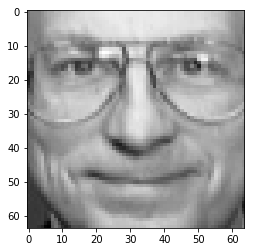

In [88]:
plt.imshow(faces.data[129].reshape(64,64),cmap='gray')

In [89]:
X_train = []  # 每个人前8张照片的上半边脸数据
y_train = []  # 每个人前8张照片的下半边脸数据
X_test = []  # 每个人后2张照片的上半边脸数据
y_test = []  # 每个人后2张照片的下半边脸数据

data = faces.data # 4096 
# display(data)
target = faces.target 

for i in range(40):
    for j in range(10):
        index = 10*i+j
        face = data[index]
        up_face = face[:2048]
        bottom_face = face[2048:]
        if j < 8:
            X_train.append(up_face)
            y_train.append(bottom_face)
        else:
            X_test.append(up_face)
            y_test.append(bottom_face)

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso()

print('knn fit time is')
%time knn.fit(X_train,y_train)

print('linear fit time is')
%time linear.fit(X_train,y_train)

print('ridge fit time is')
%time ridge.fit(X_train,y_train)

print('lasso fit time is')
%time lasso.fit(X_train,y_train)

knn fit time is
Wall time: 61 ms
linear fit time is
Wall time: 1.01 s
ridge fit time is
Wall time: 266 ms
lasso fit time is
Wall time: 24.5 s


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
# 从预测时间上看，岭回归效果最好，Lasso其次，最慢的就是knn
# 从训练时间上看，knn最快，岭回归其次，最慢的就是Lasso
# 准确率最高的是knn  缩减系数Lasso要由于岭回归

%timeit knn_y_ = knn.predict(X_test)

133 ms ± 7.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [92]:
%time line_y_ = linear.predict(X_test)

Wall time: 36 ms


In [93]:
# ridge.fit(X_train,y_train)
%timeit ridge_y_ = ridge.predict(X_test)

68.7 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
%timeit lasso_y_ = lasso.predict(X_test)

64.4 ms ± 7.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [103]:
knn_y_ = knn.predict(X_test)
lasso_y_ = lasso.predict(X_test)

In [104]:
# 使用r2_score来查看算法评分
from sklearn.metrics import r2_score

In [105]:
print('knn r2 score is %f' % r2_score(y_test,knn_y_))
print('linear r2 score is %f' % r2_score(y_test,line_y_))
print('ridge r2 score is %f' % r2_score(y_test,ridge_y_))
print('lasso r2 score is %f' % r2_score(y_test,lasso_y_))

knn r2 score is 0.539090
linear r2 score is 0.207012
ridge r2 score is 0.565036
lasso r2 score is -0.029539


In [106]:
print('ridge r2 score is %f' % r2_score(y_test,ridge_y_))

ridge r2 score is 0.565036


In [114]:
plt.subplot?

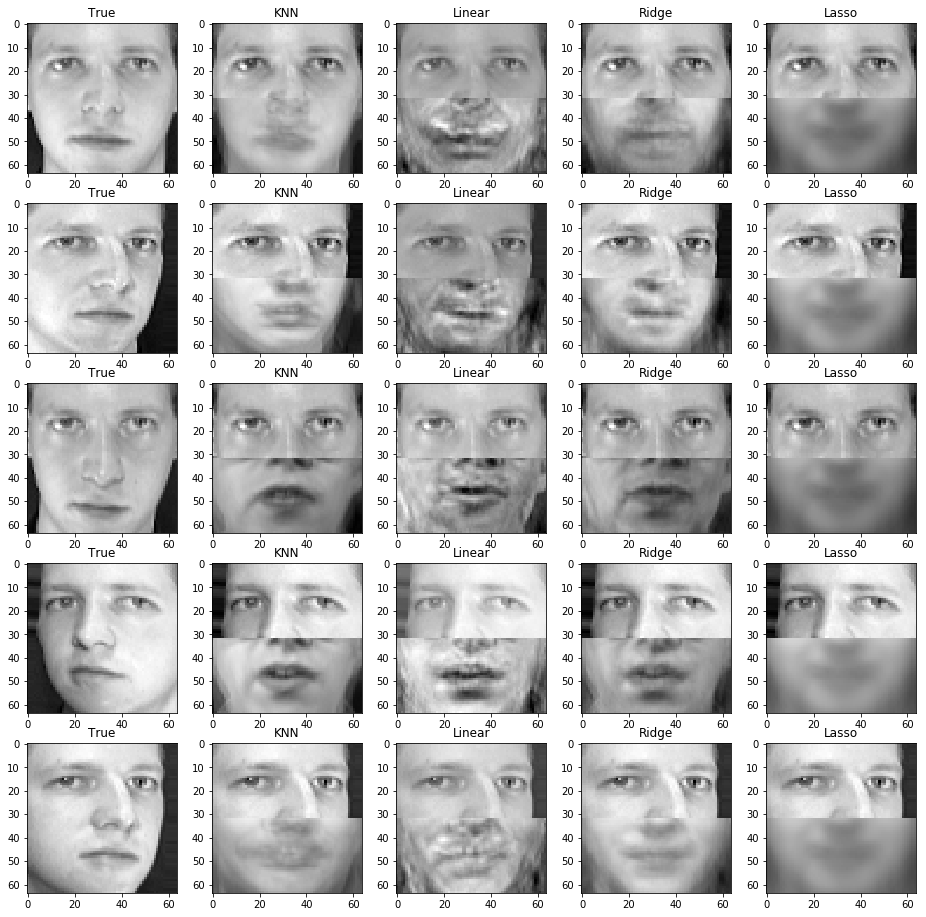

In [107]:
# 以图形的方式来查看各种模型的效果哪个最好
# 随机抽出5张人脸（从测试数据里抽取），绘制出5列，第一列为真实人脸数据，后四列为预测人脸数据
results = {'KNN':knn_y_,'Linear':line_y_,'Ridge':ridge_y_,'Lasso':lasso_y_}


plt.figure(figsize=(16,16))
for i in range(5):
    axes = plt.subplot(5,5,i*5+1)
    true_up_face = X_train[i].reshape(32,64)
    true_bottom_face = y_train[i].reshape(32,64)
    true_face = np.concatenate((true_up_face,true_bottom_face),axis=0)
    plt.imshow(true_face,cmap='gray')
    axes.set_title('True')
    j=2
    for key,value in results.items(): 
        axes = plt.subplot(5,5,i*5+j)
        j += 1
        axes.set_title(key)
        pre_bottom_face = value[i].reshape(32,64)
        pre_face = np.concatenate((true_up_face,pre_bottom_face),axis=0)
        plt.imshow(pre_face,cmap='gray')

In [108]:
results = {'KNN':knn_y_,'Linear':line_y_,'Rige':ridge_y_,'Lasso':lasso_y_}

In [109]:
for key,value in results.items():
    print(key,value)

KNN [[0.43223137 0.4471074  0.5371901  ... 0.19421487 0.20743802 0.20413224]
 [0.59421486 0.6231405  0.6586777  ... 0.22727272 0.2338843  0.23719008]
 [0.6404959  0.6801653  0.7        ... 0.14214876 0.13801654 0.12396693]
 ...
 [0.3272727  0.3578512  0.38099173 ... 0.26528925 0.25785127 0.23966941]
 [0.35123968 0.3289256  0.3371901  ... 0.49008265 0.4867769  0.49008265]
 [0.43884295 0.5008265  0.54380167 ... 0.3859504  0.35619834 0.36694214]]
Linear [[0.40870795 0.45331472 0.55208606 ... 0.25845155 0.22177044 0.19537821]
 [0.46658427 0.51696014 0.58401066 ... 0.4853812  0.3403119  0.40044165]
 [0.7306797  0.7508561  0.7530964  ... 0.05081594 0.05193704 0.0270783 ]
 ...
 [0.16949676 0.18547818 0.30312285 ... 0.29799515 0.18631995 0.16171998]
 [0.31773785 0.29735655 0.3136961  ... 0.70708776 0.7010121  0.6402804 ]
 [0.47083372 0.45964605 0.4611654  ... 0.23720905 0.29146925 0.3613352 ]]
Rige [[0.44925849 0.48035248 0.53267095 ... 0.19611137 0.17849501 0.17461001]
 [0.51226013 0.52081839

In [110]:
a=np.zeros((3,4),dtype=np.string_)


array([[b'', b'', b'', b''],
       [b'', b'', b'', b''],
       [b'', b'', b'', b'']], dtype='|S1')

In [111]:
np.zeros?